In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from datetime import datetime, date

In [2]:
class COVID19(object):
    def __init__(self, state, df_path):
        self.state = state
        self.df = pd.read_csv(df_path, header = 0)
        self.state_table = self.df[(self.df.state == self.state)]
    def data_head(self):
        print(self.df.head())
        
    def get_counties(self):
        return self.state_table.county.unique()
    
    def show_county(self, county):
        county_df = self.state_table[(self.state_table.county == county)]
        print(county_df)
    
    def plot_list(self, county_list, col_number):
        #define the plot row and col
        length = len(county_list)
        col = col_number
        if length % col_number < 0.01:
            row_number = length // col_number
        else:
            row_number = length // col_number + 1
        
        fig = plt.figure(figsize = (20/5 * col ,40/12*row_number))
        for num, ct in enumerate(county_list):
            sc_df = self.state_table[(self.state_table.county == ct)]
            dates = pd.to_datetime(sc_df.date)
            cases = sc_df.cases.values
            deaths = sc_df.deaths.values
           
            ax = fig.add_subplot(row_number, col, num+1)
            ax.plot(dates, cases, c = "green")
            ax.plot(dates, deaths, c = "red")
            plt.ylabel("people")
            plt.xticks([])
            plt.title(ct)
        #plt.xticks(rotation=90)
            plt.legend(["Cases", "Deaths"])
    def plot_all(self, county_list):
        fig = plt.figure(figsize = (8 ,5))
        ax = fig.add_subplot(1, 1, 1)
        for num, ct in enumerate(county_list):
            sc_df = self.state_table[(self.state_table.county == ct)]
            dates = pd.to_datetime(sc_df.date)
            cases = sc_df.cases.values
            deaths = sc_df.deaths.values
           
            
            ax.plot(dates, cases, label = ct)
        plt.ylabel("Cases")
        plt.xticks(rotation=90)
        plt.legend()
        
    def plot_county(self, county):
        fig = plt.figure(figsize = (8 ,5))
        ax = fig.add_subplot(1, 1, 1)
        sc_df = self.state_table[(self.state_table.county == county)]
        dates = pd.to_datetime(sc_df.date)
        cases = sc_df.cases.values
        deaths = sc_df.deaths.values
        ax.plot(dates, cases, label = county)
        plt.ylabel("Cases")
        plt.xticks(rotation=90)
        plt.legend()

In [3]:
file_path = 'us-counties.csv'
state = 'Florida'
florida = COVID19(state, file_path)
#florida.data_head()
#florida.get_counties()
#florida.plot_list(florida.get_counties(), 8)

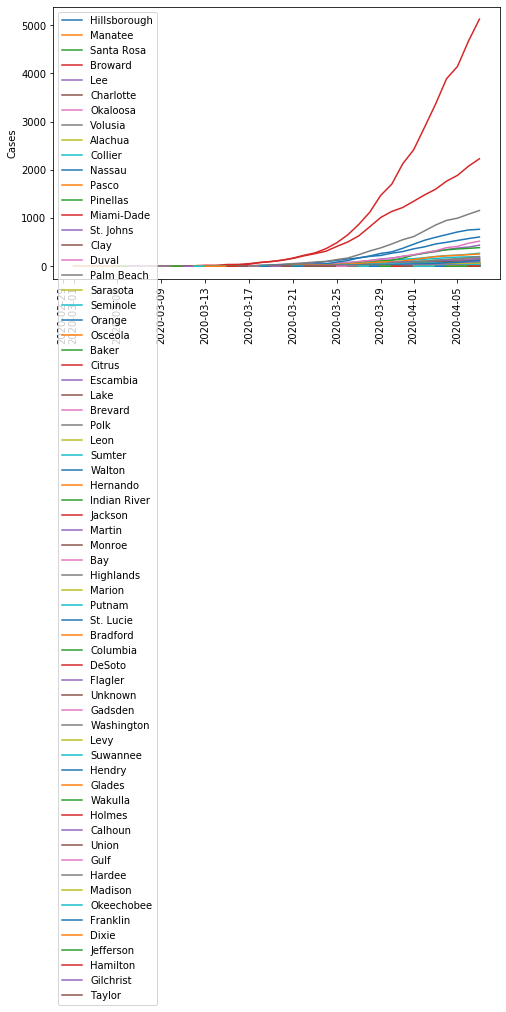

In [4]:
#florida.show_county("Alachua")
florida.plot_all(florida.get_counties())

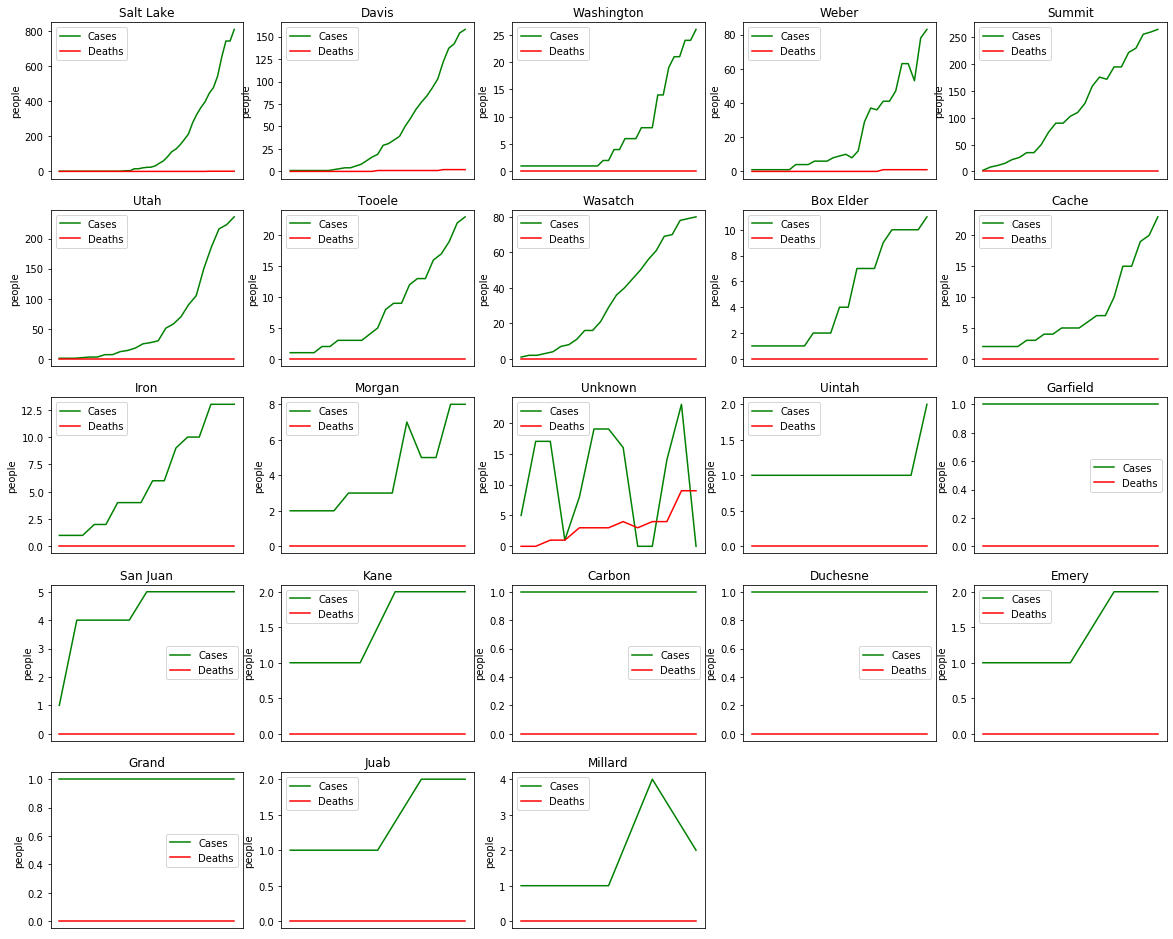

In [5]:
file_path = 'us-counties.csv'
state = 'Utah'
utah = COVID19(state, file_path)
#florida.data_head()
utah.get_counties()
utah.plot_list(utah.get_counties(), 5)

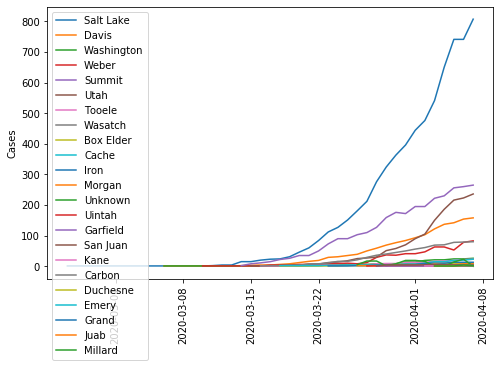

In [6]:
utah.plot_all(utah.get_counties())

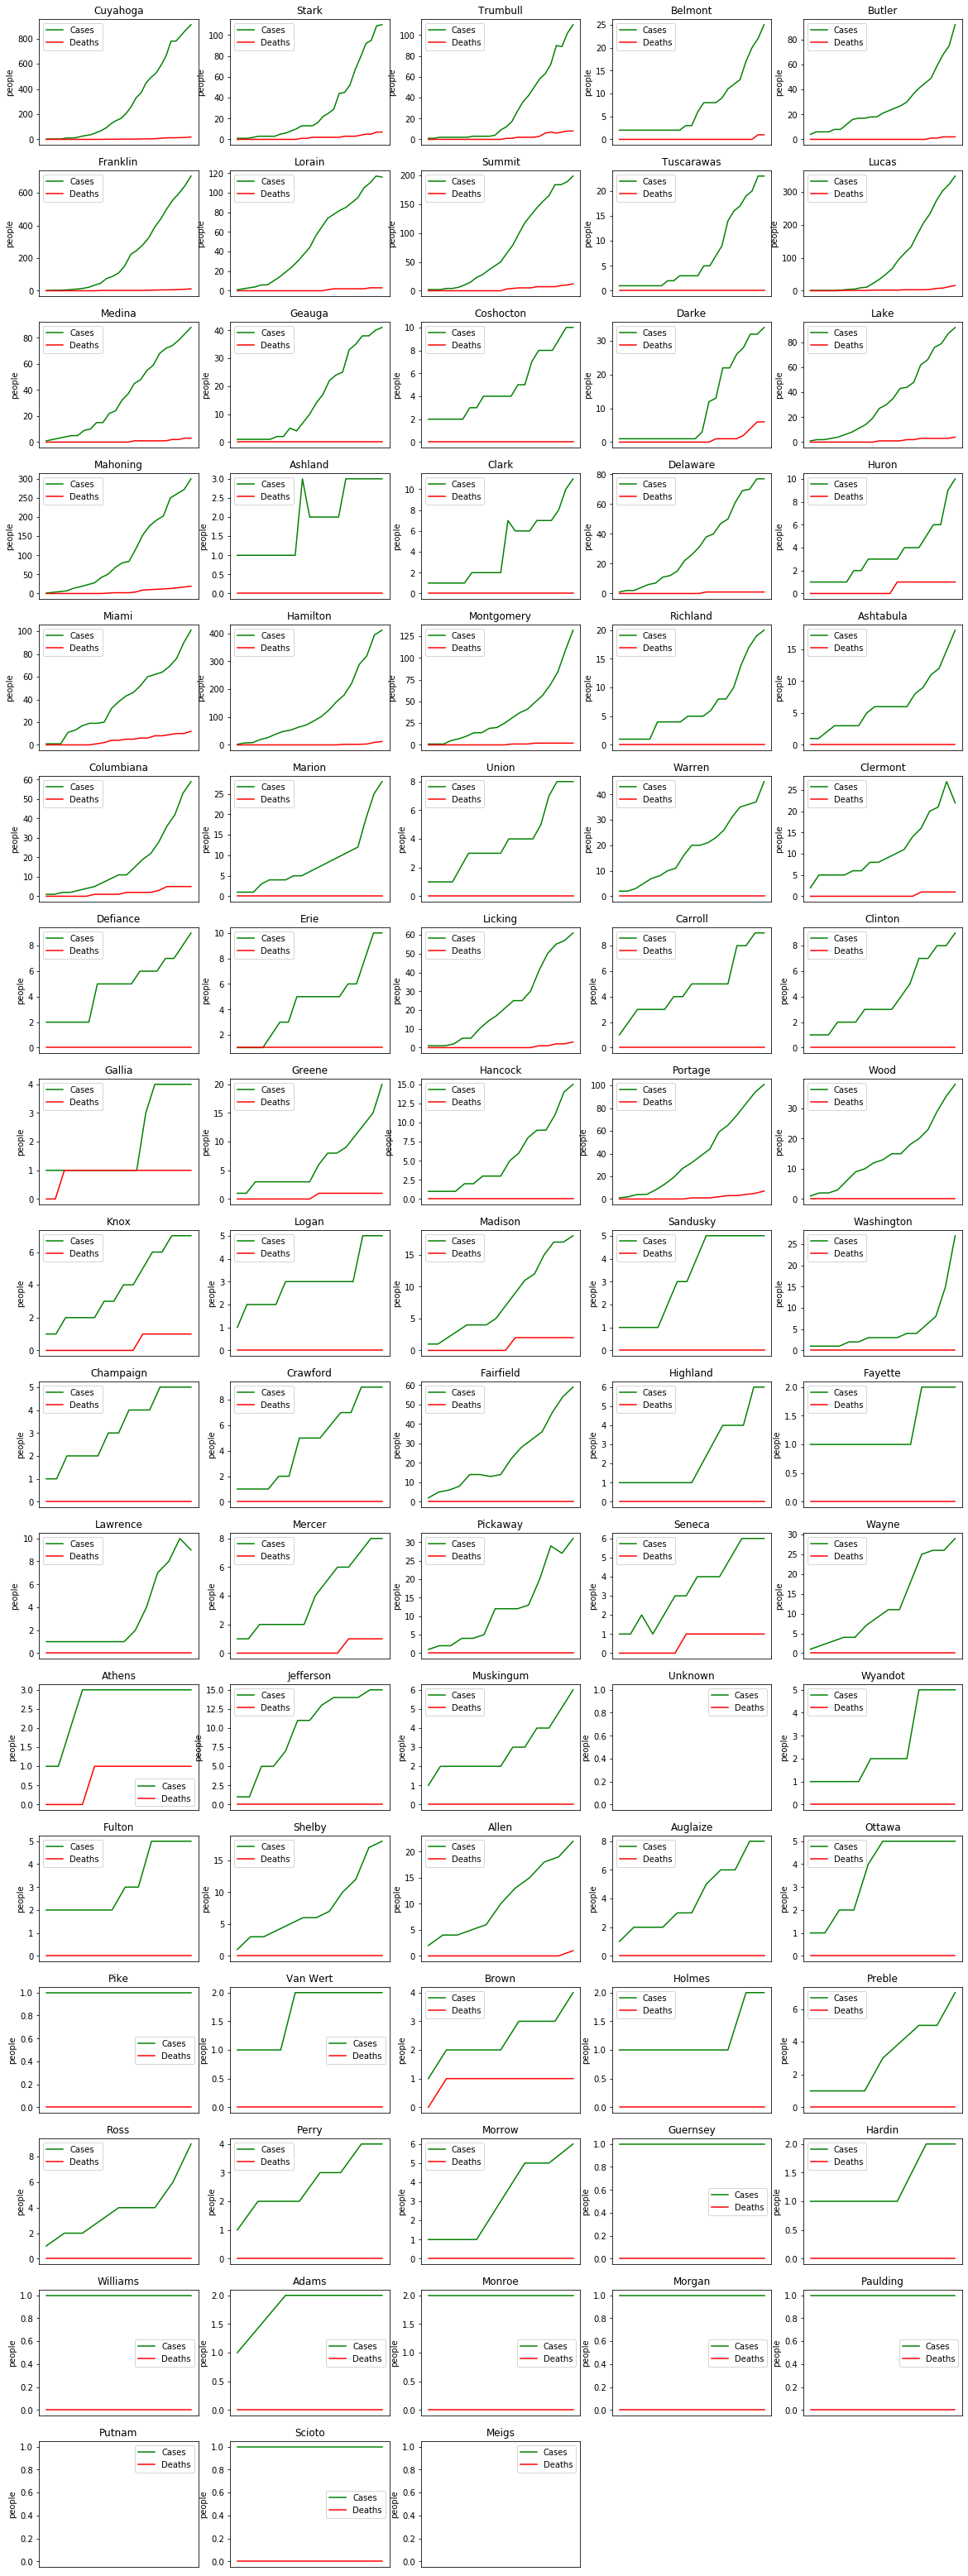

In [7]:
file_path = 'us-counties.csv'
state = 'Ohio'
ohio = COVID19(state, file_path)
#florida.data_head()
ohio.get_counties()
ohio.plot_list(ohio.get_counties(), 5)

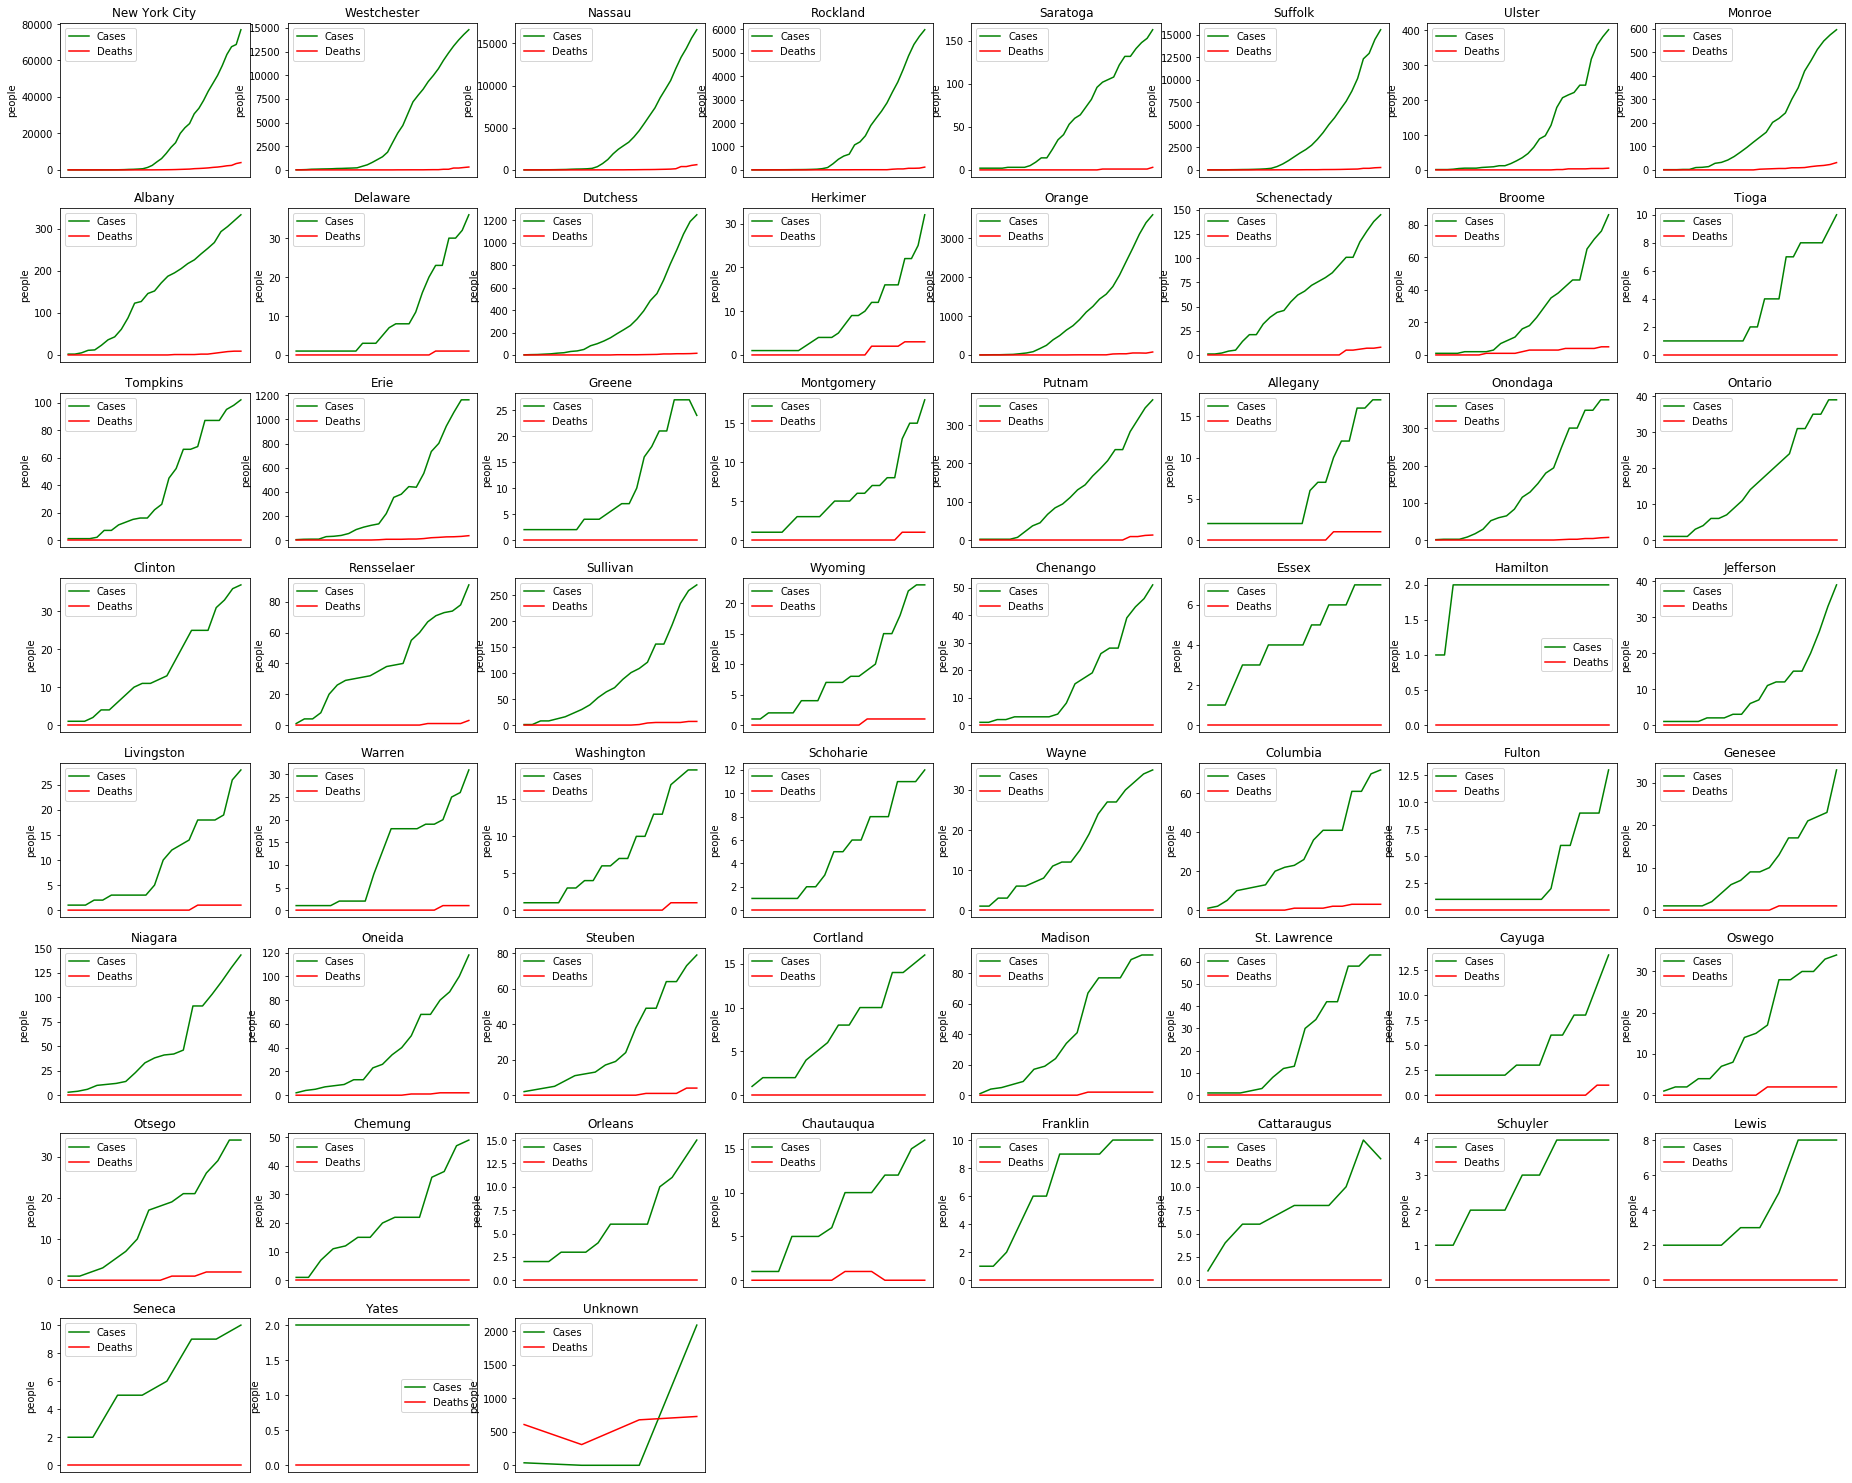

In [8]:
newyork = COVID19("New York", file_path)
newyork.plot_list(newyork.get_counties(), 8)